In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.baseline import Baseline

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

#### Load data and preprocess

In [4]:
data = DataClass(config)
df, data_dict, encoders_dict = data.build()

2023-03-02 21:06:21,036 - hb_mep.data_access.core - INFO - Reading data ....
2023-03-02 21:06:21,042 - hb_mep.data_access.core - INFO - Processing data ...
2023-03-02 21:06:21,052 - hb_mep.utils.utils - INFO - func:build took: 0.02 sec


In [5]:
data_dict.keys()

dict_keys(['num_participants', 'num_segments', 'segments_per_participant', 'total_combinations', 'intensity', 'Biceps', 'participant', 'level'])

In [6]:
encoders_dict.keys()

dict_keys(['participant_encoder', 'segment_encoder'])

#### Initialize model

In [7]:
model = Baseline(config)

#### Run MCMC inference

In [8]:
mcmc, posterior_samples = model.sample(data_dict=data_dict)

2023-03-02 21:06:21,750 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-03-02 21:06:21,751 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-02 21:06:21,751 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-02 21:06:21,752 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-03-02 21:06:21,753 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-03-02 21:06:21,804 - hb_mep.models.baseline - INFO - Running inference wit

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

#### Diagnostics

In [9]:
mcmc.print_summary()


                                             mean       std    median      5.0%     95.0%     n_eff     r_hat
                                 a[0,0]      3.66      0.14      3.69      3.38      3.82   1863.27      1.00
                                 a[1,0]      2.07      0.16      2.07      1.80      2.29    695.77      1.00
                                 a[2,0]      5.38      0.21      5.41      5.08      5.73    422.91      1.00
                         a_global_scale      1.50      1.08      1.29      0.05      3.03   1012.08      1.01
                      a_level_mean[0,0]      3.35      1.18      3.57      1.10      4.94   1210.41      1.00
                      a_level_mean[1,0]      2.10      1.04      2.02      0.36      3.37   1135.78      1.00
                      a_level_mean[2,0]      4.77      1.49      5.18      1.77      6.74   3105.41      1.00
              a_level_mean_global_scale      4.53      1.97      4.20      1.71      7.67    749.79      1.00
         

#### Plot fitted curves

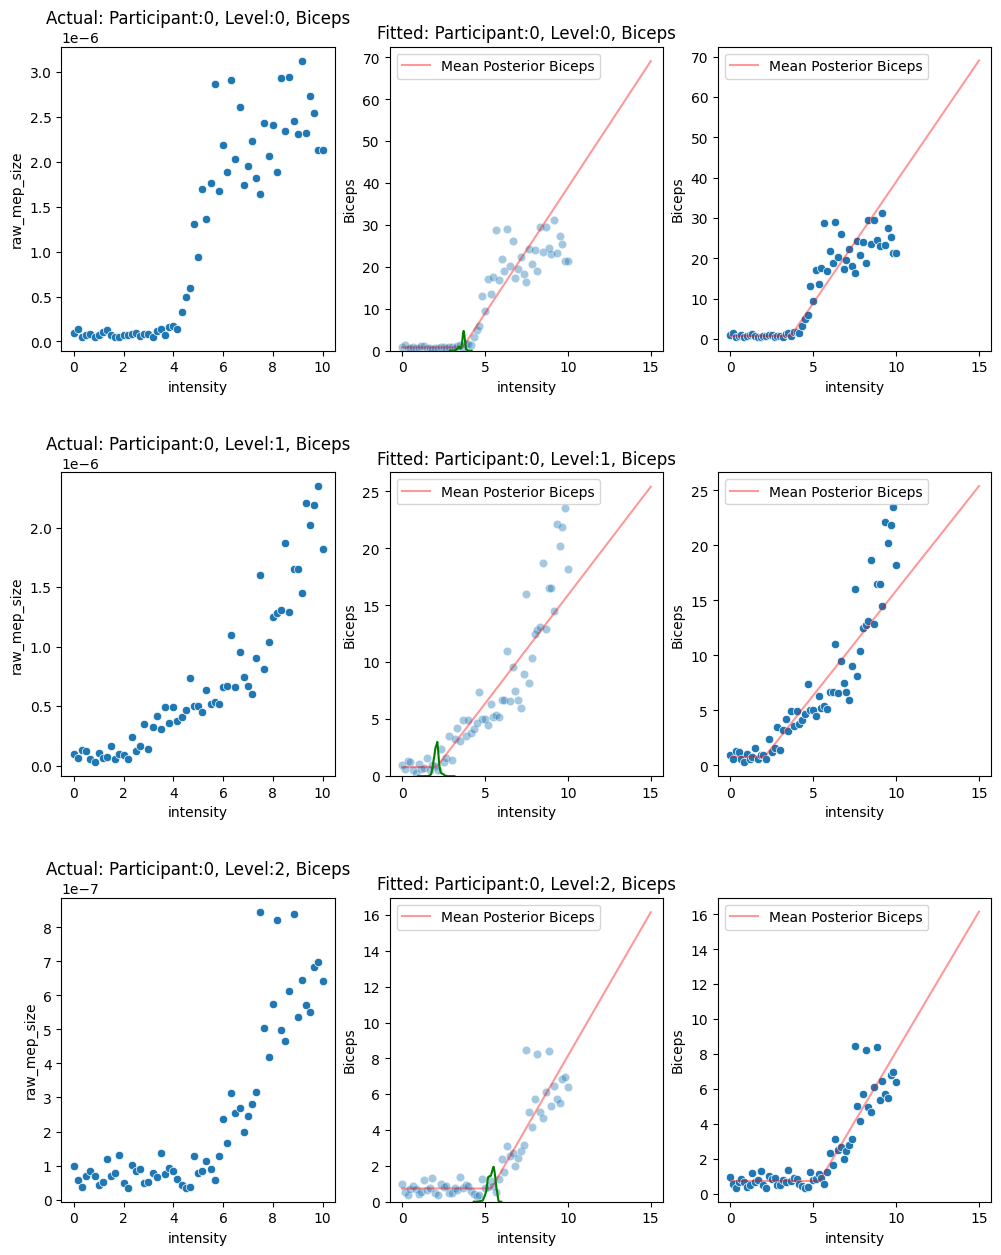

In [10]:
model.plot_fit(df=df, data_dict=data_dict, encoders_dict=encoders_dict, posterior_samples=posterior_samples);

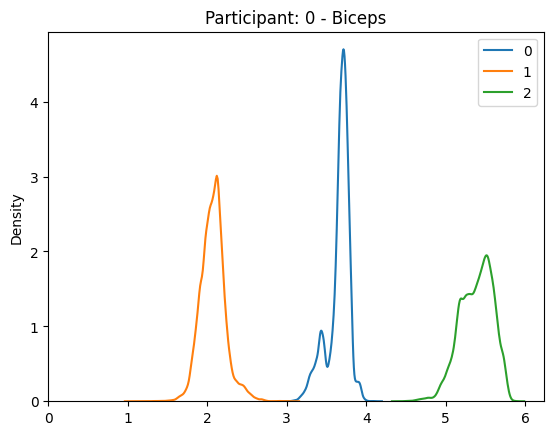

In [11]:
model.plot_kde(data_dict=data_dict, posterior_samples=posterior_samples);